# Data Prep and Model Training

Polynomial Regression and Random Forest algos

## Import and Prepare Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import training data

df_train = pd.read_csv('Training/train_engineered_cleaned_merged_flights_Jan_1w.csv')

In [3]:
# import validation data

df_val = pd.read_csv('Validation/vali_engineered_cleaned_merged_flights_Jan_1w.csv')

In [4]:
df_train.shape

(224631, 92)

In [5]:
df_val.shape

(96233, 77)

In [6]:
# drop extra columns in validation that don't appear in train
extra = df_train.columns.difference(df_val.columns).tolist()
df_train.drop(extra, axis=1, inplace=True)

In [7]:
# drop extra columns in validation that don't appear in train
extra = df_train.columns.difference(df_val.columns).tolist()
df_train.drop(extra, axis=1, inplace=True)

In [8]:
df_train.describe()

,dep_delay,arr_delay,distance,numflights,numstrikes,strikeprob,percentflights,region_N,region_O,region_S,...,DelayA_carrier,DelayA_origin,DelayA_dest,DelayA_hourly,num_flights_hourly,DelayD_hourly,DelayA_origin_hourly,DelayA_carrier_hourly,DelayD_origin_hourly,DelayD_carrier_hourly
count,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,2.246310e+05,224631.00000,224631.000000,224631.000000,...,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000,224631.000000
mean,12.528947,6.406938,783.442161,288357.645196,691.453228,0.015713,1.803150e-02,0.16552,0.026154,0.349088,...,6.406938,6.406938,6.406938,6.406938,12779.023612,12.528947,6.406938,6.406938,12.528947,12.528947
std,50.643821,53.735954,592.777500,233247.448155,821.962710,0.018678,1.458536e-02,0.37165,0.159593,0.476683,...,6.955052,6.351581,6.325939,3.656893,2581.570719,3.805771,11.400573,8.728639,10.772709,7.983616
min,-47.000000,-820.000000,31.000000,2.000000,0.000000,0.000000,1.250634e-07,0.00000,0.000000,0.000000,...,-4.758065,-18.555556,-73.111111,-0.837838,63.000000,4.657671,-51.000000,-49.000000,-44.000000,-18.333333
25%,-5.000000,-15.000000,347.000000,98562.000000,133.000000,0.003022,6.163251e-03,0.00000,0.000000,0.000000,...,2.892195,3.295014,2.474310,2.410936,12601.000000,9.060413,-0.049180,0.106383,6.300730,7.162420
50%,-1.000000,-5.000000,621.000000,257214.000000,410.000000,0.009317,1.608403e-02,0.00000,0.000000,0.000000,...,4.199796,4.950325,5.867170,6.940113,13855.000000,12.620264,4.922727,6.330658,10.874488,11.860668
75%,10.000000,10.000000,1023.000000,379367.000000,865.000000,0.019656,2.372247e-02,0.00000,0.000000,1.000000,...,7.170818,10.430909,8.244493,9.543925,14022.000000,16.007903,11.701439,10.125438,17.063401,16.536419
max,1752.000000,1778.000000,4983.000000,790253.000000,3799.000000,0.086329,4.941588e-02,1.00000,1.000000,1.000000,...,28.619673,151.363636,113.045455,41.925926,14507.000000,50.197531,536.333333,109.083333,546.666667,112.333333


In [9]:
df_val.describe()

,arr_delay,distance,numflights,numstrikes,strikeprob,percentflights,region_N,region_O,region_S,region_W,...,DelayA_carrier,DelayA_origin,DelayA_dest,DelayA_hourly,num_flights_hourly,DelayD_hourly,DelayA_origin_hourly,DelayA_carrier_hourly,DelayD_origin_hourly,DelayD_carrier_hourly
count,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,...,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96233.000000,96120.000000,96232.000000,96120.000000,96232.000000
mean,6.547733,786.857066,287400.572423,685.752341,0.015583,0.017972,0.166429,0.025792,0.348882,0.313500,...,6.373987,6.415250,6.408765,6.396742,5470.845479,12.517061,6.353939,6.360412,12.497816,12.491480
std,53.463693,597.496087,232622.709818,816.461342,0.018553,0.014546,0.372468,0.158514,0.476619,0.463918,...,6.943577,6.308101,6.391435,3.658411,1122.191313,3.809597,11.625051,8.695531,11.017661,7.944299
min,-699.000000,31.000000,45.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,...,-4.758065,-18.555556,-73.111111,-0.837838,33.000000,4.657671,-38.000000,-23.400000,-28.000000,-18.333333
25%,-15.000000,347.000000,98562.000000,133.000000,0.003022,0.006163,0.000000,0.000000,0.000000,0.000000,...,2.892195,3.295014,2.474310,2.410936,5324.000000,9.060413,-0.064516,0.038095,6.300730,7.116838
50%,-5.000000,621.000000,257214.000000,410.000000,0.009317,0.016084,0.000000,0.000000,0.000000,0.000000,...,4.199796,4.950325,5.867170,6.940113,5916.000000,12.620264,4.837748,6.168242,10.863158,11.700803
75%,10.000000,1024.000000,379367.000000,865.000000,0.019656,0.023722,0.000000,0.000000,1.000000,1.000000,...,7.170818,10.430909,8.244493,9.543925,6096.000000,16.007903,11.622034,10.245238,17.061728,16.536419
max,1638.000000,4983.000000,790253.000000,3799.000000,0.086329,0.049416,1.000000,1.000000,1.000000,1.000000,...,28.619673,151.363636,113.045455,41.925926,6207.000000,50.197531,536.333333,109.083333,546.666667,112.333333


### Explore Correlations

In [10]:
# Top 10 correlated features

df_train[df_train.columns[1:]].corr()['arr_delay'].nlargest(10)

arr_delay                1.000000
dep_delay                0.940981
DelayA_origin_hourly     0.212159
DelayD_origin_hourly     0.199803
DelayA_carrier_hourly    0.162436
DelayD_carrier_hourly    0.153988
DelayA_carrier           0.129430
DelayA_origin            0.118200
DelayA_dest              0.117723
DelayD_dest              0.111221
Name: arr_delay, dtype: float64

### Pearson Correlation

In [11]:

# create correlation matrix

corr = df_train.corr().abs()
corr

,dep_delay,arr_delay,distance,numflights,numstrikes,strikeprob,percentflights,region_N,region_O,region_S,...,DelayA_carrier,DelayA_origin,DelayA_dest,DelayA_hourly,num_flights_hourly,DelayD_hourly,DelayA_origin_hourly,DelayA_carrier_hourly,DelayD_origin_hourly,DelayD_carrier_hourly
dep_delay,1.000000,0.940981,0.015163,0.003701,0.006782,0.006782,0.003701,0.034838,0.017649,0.011968,...,0.111484,0.102305,0.097346,0.074430,0.009561,0.075148,0.200326,0.149444,0.212715,0.157642
arr_delay,0.940981,1.000000,0.015040,0.001107,0.000724,0.000724,0.001107,0.021674,0.001537,0.000118,...,0.129430,0.118200,0.117723,0.068053,0.006371,0.067403,0.212159,0.162436,0.199803,0.153988
distance,0.015163,0.015040,1.000000,0.078064,0.024147,0.024147,0.078064,0.023770,0.109518,0.091744,...,0.085974,0.035419,0.029891,0.025402,0.062502,0.022567,0.005876,0.073308,0.018450,0.037144
numflights,0.003701,0.001107,0.078064,1.000000,0.658315,0.658315,1.000000,0.114780,0.164544,0.056806,...,0.101161,0.009368,0.095866,0.074964,0.076406,0.092924,0.005219,0.068485,0.017401,0.024562
numstrikes,0.006782,0.000724,0.024147,0.658315,1.000000,1.000000,0.658315,0.117346,0.125166,0.031209,...,0.006919,0.006126,0.059944,0.055484,0.021237,0.068533,0.003413,0.001373,0.031884,0.032902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DelayD_hourly,0.075148,0.067403,0.022567,0.092924,0.068533,0.068533,0.092924,0.001873,0.034678,0.022263,...,0.018044,0.002920,0.028360,0.990449,0.127225,1.000000,0.317700,0.414952,0.353279,0.476698
DelayA_origin_hourly,0.200326,0.212159,0.005876,0.005219,0.003413,0.003413,0.005219,0.102158,0.007247,0.000557,...,0.179438,0.557128,0.109305,0.320764,0.030030,0.317700,1.000000,0.326625,0.941759,0.314434
DelayA_carrier_hourly,0.149444,0.162436,0.073308,0.068485,0.001373,0.001373,0.068485,0.090968,0.029288,0.049217,...,0.796808,0.209814,0.209199,0.418953,0.039223,0.414952,0.326625,1.000000,0.323718,0.947993
DelayD_origin_hourly,0.212715,0.199803,0.018450,0.017401,0.031884,0.031884,0.017401,0.163776,0.082970,0.056263,...,0.170351,0.480947,0.117264,0.349905,0.044946,0.353279,0.941759,0.323718,1.000000,0.350058


<AxesSubplot:>

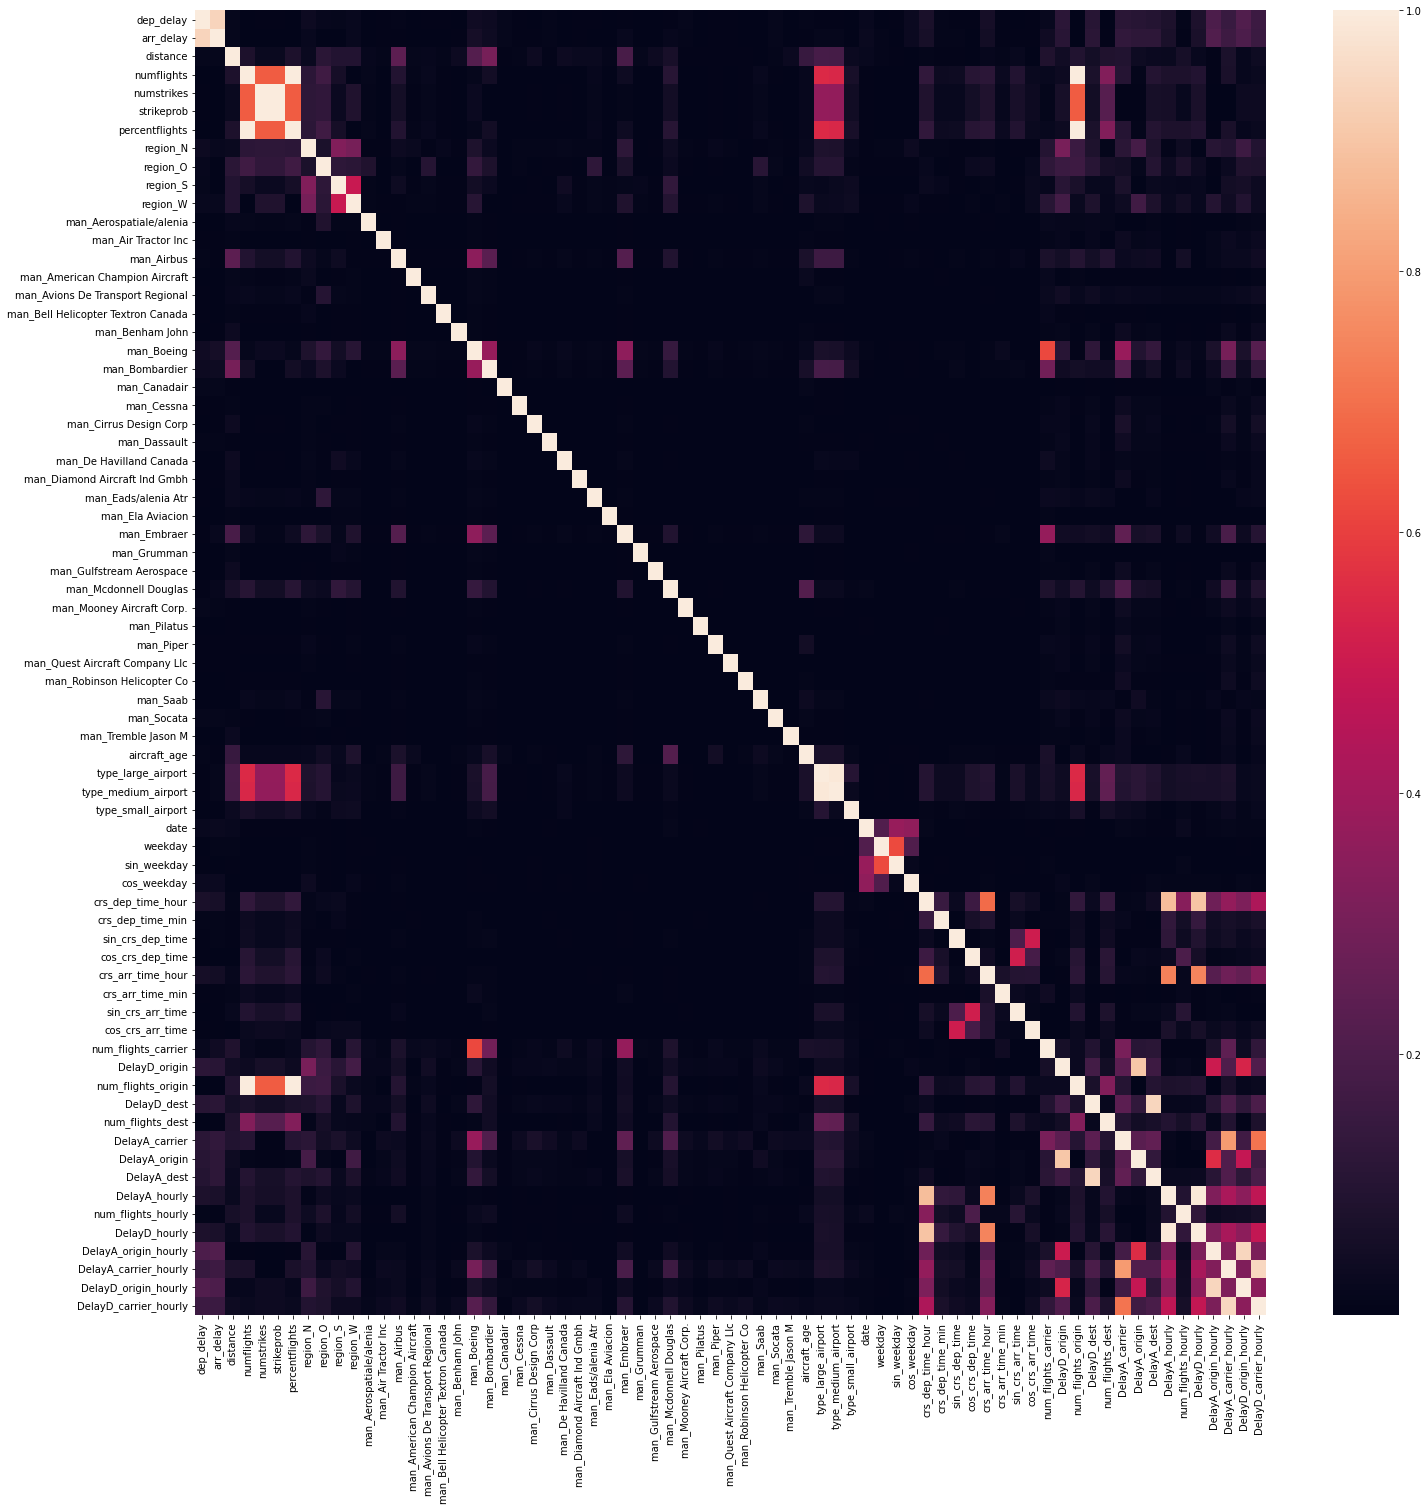

In [12]:
# heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24,24))
sns.heatmap(corr)

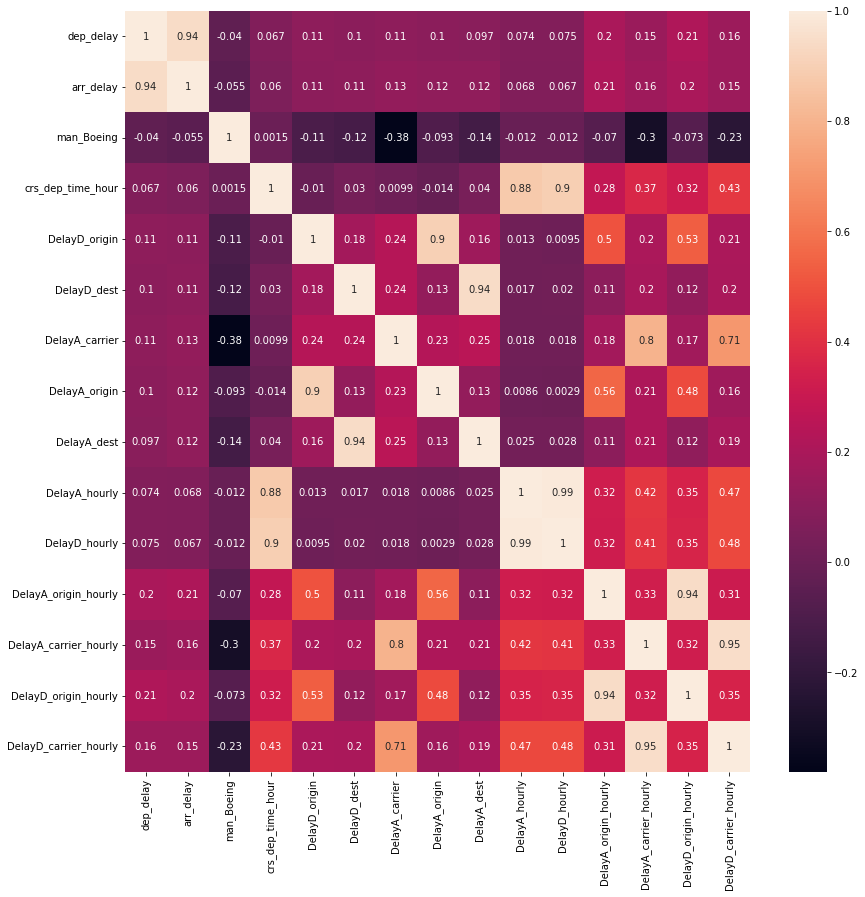

In [13]:
# Features with >0.05 pearsons' correlation coefficient

top_corr_features = corr.index[abs(corr["arr_delay"])>0.05]
plt.figure(figsize=(14,14))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True)

### Drop columns from daily scrum, object dtype, target columns I'm not using here

In [14]:
droplist= ['crs_dep_time',
         'crs_arr_time',
         'numflights',
         'numstrikes',
         'weekday',
         'crs_dep_time_hour',
         'crs_dep_time_min',
         'crs_arr_time_hour',
         'crs_arr_time_min',
         'fl_date',
         'op_unique_carrier',
         'origin',
         'dest',
         'dep_delay',
        ]

df_train.drop(droplist, axis=1, inplace=True)
df_val.drop(droplist, axis=1, inplace=True)

### Outlier Removal

### Drop NaN

In [15]:
# drop rows with missing values

df_val.dropna(inplace=True)
df_train.dropna(inplace=True)

### Split into X, y

In [16]:
# Create separate series for y values

y_train = df_train.arr_delay
y_val = df_val.arr_delay

In [17]:
# Drop target variables in both dataframes

df_train.drop(['arr_delay'], axis=1, inplace=True)
df_val.drop(['arr_delay'], axis=1, inplace=True)

### Scaling

In [18]:
# select target features

numfeats = ['distance',
               'percentflights',
               'aircraft_age',
               'strikeprob',
               'num_flights_carrier',
               'DelayD_origin',
               'num_flights_origin',
               'DelayD_dest',
               'num_flights_dest',
               'DelayA_origin',
               'DelayA_dest',
               'DelayA_hourly',
               'num_flights_hourly',
               'DelayD_hourly',
               'DelayA_origin_hourly',
               'DelayA_carrier_hourly',
               'DelayD_origin_hourly',
               'DelayD_carrier_hourly'
              ]

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
# apply scaler

scaler = MinMaxScaler()
df_trainscaled = pd.DataFrame(scaler.fit_transform(df_train[numfeats].astype(float)), columns=numfeats)
df_valscaled = pd.DataFrame(scaler.transform(df_val[numfeats].astype(float)), columns=numfeats)

In [21]:
# drop unscaled features from original df

df_val.drop(numfeats, axis=1, inplace=True)
df_train.drop(numfeats, axis=1, inplace=True)

In [22]:
# merge scaled columns back into df

df_train = df_train.join(df_trainscaled)
df_val = df_val.join(df_valscaled)

## Feature selection

In [23]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

### Variance Threshold

In [24]:
# remove variables with variance < 0.1

vt = VarianceThreshold(0.1)
df_trainfilter = vt.fit_transform(df_train)

In [25]:
# convert back to dataframe
selected_columns = df_train.columns[vt.get_support()]
df_trainfilter = pd.DataFrame(df_trainfilter, columns = selected_columns)

In [26]:
# mirror change into validation data

columns = df_val.columns.difference(df_trainfilter.columns).tolist()
df_valfilter = df_val.drop(columns, axis=1)

### Correlated Features

In [27]:
# create correlation matrix

df_traincorr = df_trainfilter.corr().abs()
df_valcorr = df_valfilter.corr().abs()

In [28]:
# iterate thru and find pairs with correlation > 0.8

trainindices = np.where(df_traincorr > 0.8) 
trainindices = [(df_traincorr.index[x], df_traincorr.columns[y]) 
for x, y in zip(*trainindices)
    if x != y and x < y]

valindices = np.where(df_valcorr > 0.8) 
valindices = [(df_valcorr.index[x], df_valcorr.columns[y]) 
for x, y in zip(*valindices)
    if x != y and x < y]

In [29]:
# drop pairs found in last step

for idx in trainindices: #each pair
    try:
        df_trainfilter.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass
    
for idx in valindices: #each pair
    try:
        df_valfilter.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [30]:
# this process introduces x rows of null values, so we have to drop those

print(np.any(np.isnan(df_valfilter)))

# make list of indexes of columns to drop
nanindex = df_valfilter[df_valfilter.num_flights_carrier.isnull()].index.tolist()
df_valfilter.dropna(inplace=True)
y_val.drop(index=nanindex, inplace=True)

print(np.any(np.isnan(df_valfilter)))

print(np.any(np.isnan(df_trainfilter)))

# make list of indexes of columns to drop
nanindex = df_trainfilter[df_trainfilter.num_flights_carrier.isnull()].index.tolist()
df_trainfilter.dropna(inplace=True)
y_train.drop(index=nanindex, inplace=True)

print(np.any(np.isnan(df_trainfilter)))

True
False
False
False


### Forward Regression

In [31]:
# fit forward regressor, select 10 best features from remaining

skb = SelectKBest(f_regression, k=10)
X_train = skb.fit_transform(df_trainfilter, y_train)
X_val = skb.fit_transform(df_valfilter, y_val)

In [32]:
# convert back to dataframe

# df_trainfilter.columns[skb.get_support()]
X_train = pd.DataFrame(X_train,columns=df_trainfilter.columns[skb.get_support()])
X_val = pd.DataFrame(X_val,columns=df_valfilter.columns[skb.get_support()])

# Modeling

### Linear Regression Baseline

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_val)

In [36]:
mae = metrics.mean_absolute_error(y_val, y_pred)
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_val,y_pred)

In [37]:
print(f'''
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
r^2: {r2}
''')


MAE: 25.537586633206704
MSE: 2805.581151576931
RMSE: 52.96773689310249
r^2: 0.019669983423224013



### Polynomial Regression

### RandomForest Regressor

In [38]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [39]:
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
X_val_arr = np.array(X_val)

In [40]:
clf=RandomForestRegressor(n_estimators=1000, bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12)
clf.fit(X_train_arr,y_train_arr)

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=1000)

In [41]:
y_pred = clf.predict(X_val_arr)

In [42]:
mae = metrics.mean_absolute_error(y_val, y_pred)
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_val,y_pred)

In [43]:
print(f'''
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
r^2: {r2}
''')


MAE: 25.150927351246782
MSE: 2864.2844099108815
RMSE: 53.51900979942437
r^2: -0.0008421896726376055



In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
rf = RandomForestRegressor()

In [ ]:
parameter_candidates = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = parameter_candidates, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

### SGD Regressor

In [27]:
from sklearn.linear_model import SGDRegressor

In [31]:
regressor = SGDRegressor(alpha=0.01, learning_rate='optimal', loss='squared_error', penalty='l2')
regressor.fit(df_trainfilter, y_train)

/home/mcoffey/anaconda3/envs/lhl_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(alpha=0.01, learning_rate='optimal')

In [34]:
y_pred = regressor.predict(df_valfilter)

In [38]:
mae = metrics.mean_absolute_error(y_val, y_pred)
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_val,y_pred)

In [39]:
print(f'''
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
r^2: {r2}
''')


MAE: 737371.5477624245
MSE: 2210834905621.5
RMSE: 1486887.6573640322
r^2: -772512966.0400873



In [ ]:
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

In [ ]:
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_